In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import stats
import matplotlib
import glob
import os

## Lenti MPRA

In [2]:
## lolipop plot
df = pd.read_csv('../lentiMPRA/results/lenti.csv',index_col=None)
df = df.replace({'base_CNN_model': 'One-hot','sei': 'SEI','dnabert2': 'DNABERT2','gpn': 'GPN','hyena': 'Hyena'})

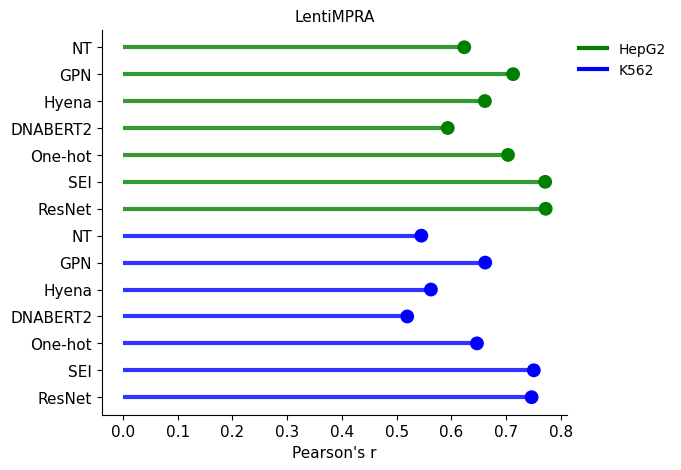

In [3]:
model_ordering = ['NT','GPN','Hyena','DNABERT2','One-hot','SEI','ResNet']
model_ordering = model_ordering[::-1]
df.Model = df.Model.astype("category")
df.Model = df.Model.cat.set_categories(model_ordering)
df = df.sort_values(['Cell Type','Model'])
my_range=range(0,len(df))
my_color=np.where(df['Cell Type']=='HepG2','b','g')
fig,ax = plt.subplots(1,1,figsize=(6,5))
plt.hlines(y=range(len(df)), xmin=0, xmax=df["Pearson's R"], color=my_color,linewidth=3, alpha =0.8)
plt.scatter(df["Pearson's R"], range(len(df)), color=my_color, s=80, alpha=1)
plt.title("LentiMPRA",fontsize=11)
plt.xlabel("Pearson's r", fontsize=11)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.yticks(range(len(df)),df['Model'].to_list());
# plt.grid()
custom_lines = [matplotlib.lines.Line2D([0], [0], color="g", lw=3),
                matplotlib.lines.Line2D([0], [0], color="b", lw=3)]
plt.legend(custom_lines, ['HepG2', 'K562'],  bbox_to_anchor=(1,1),frameon=False);
plt.savefig('./lenti.svg')

## CAGI

In [4]:
## Bar plot ?
df = pd.read_csv('../CAGI/result.csv')
plot_df = pd.melt(df,id_vars=['Model'],value_vars=['HepG2', 'K562'])

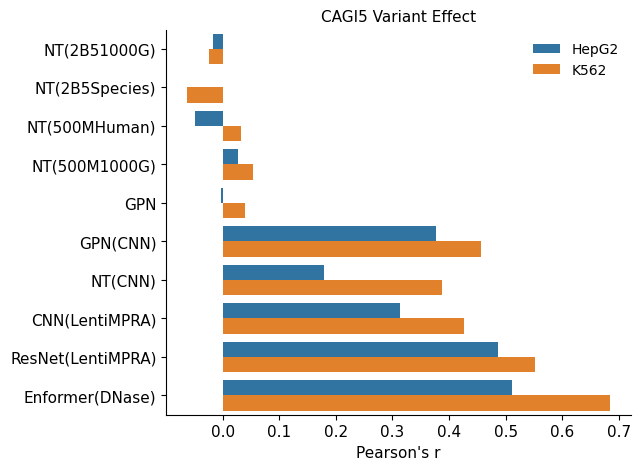

In [5]:
fig,ax = plt.subplots(1,1,figsize=(6,5))
sns.barplot(plot_df,y='Model',x='value',hue='variable')
#plt.yticks(rotation=45,fontsize=9);
plt.xlabel("Pearson's r",fontsize=11)
plt.ylabel("")
plt.title('CAGI5 Variant Effect',fontsize = 11)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(title='',frameon=False);
plt.yticks(fontsize=11);
plt.xticks(fontsize=11);
plt.savefig('./cagi.svg')

## Alternative Splicing

In [2]:
df1 = pd.DataFrame()
for file in glob.glob('../alternative-splicing/result/*.csv'):
    df = pd.read_csv(file,index_col = 0)
    mean_df = pd.DataFrame(df.iloc[:,1:].mean())
    mean_df['Model'] = os.path.basename(file)[:-9]
    df1 = pd.concat((df1,mean_df),ignore_index=True)
df1['Downsample factor'] = '1.0'
df1 = df1.replace({'NT10_CNN': 'NT'})
df1 = df1.replace({'sei': 'SEI'})
df1 = df1.replace({'rbp': 'RBP'})
df1 = df1.replace({'DNABERT': 'DNABERT2'})
df1 = df1.replace({'CNN': 'One-hot'})

In [3]:
## P value calculation
for model_name in df1['Model'].unique():
    print(model_name) 
    p_value = stats.ttest_ind(df1[df1['Model'] == 'One-hot'][0],df1[df1['Model'] == model_name][0],alternative='greater')
    print(p_value) 

DNABERT2
Ttest_indResult(statistic=11.653347936150357, pvalue=1.3398212679961593e-06)
Hyena
Ttest_indResult(statistic=4.453579371670754, pvalue=0.0010645732551324923)
SEI
Ttest_indResult(statistic=20.803852545203448, pvalue=1.4941628322525003e-08)
One-hot
Ttest_indResult(statistic=0.0, pvalue=0.5)
GPN
Ttest_indResult(statistic=3.539202052937127, pvalue=0.003814371427963383)
NT
Ttest_indResult(statistic=4.460132039750179, pvalue=0.001055346840027257)
NT32_CNN
Ttest_indResult(statistic=10.092949979658435, pvalue=3.960656400921355e-06)
RBP
Ttest_indResult(statistic=3.963977592548803, pvalue=0.0020769094051846355)


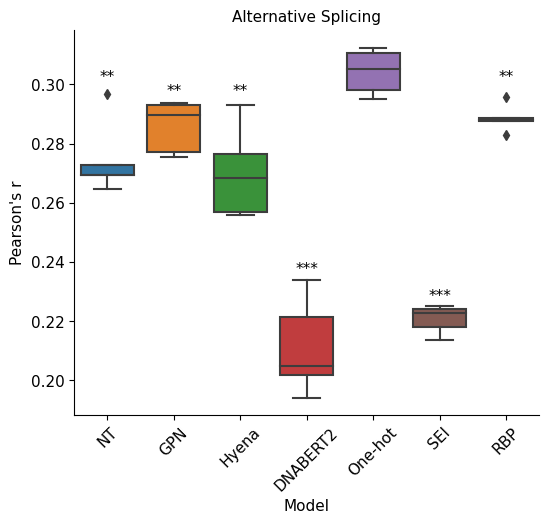

In [26]:
fig, ax = plt.subplots(figsize=(6,5))
sns.boxplot(df1,x='Model',y=0,ax = ax,order = ['NT','GPN','Hyena','DNABERT2','One-hot','SEI','RBP'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)
plt.ylabel("Pearson's r",fontsize=11)
plt.xlabel("Model",fontsize=11)
plt.title('Alternative Splicing',fontsize=11)
plt.yticks(fontsize=11);
plt.xticks(fontsize=11,rotation=45);
plt.text(0, 0.3, "**", ha='center', va='bottom', color='k', fontsize=11)
plt.text(1, 0.295, "**", ha='center', va='bottom', color='k', fontsize=11)
plt.text(2, 0.295, "**", ha='center', va='bottom', color='k', fontsize=11)
plt.text(3, 0.235, "***", ha='center', va='bottom', color='k', fontsize=11)
plt.text(5, 0.226, "***", ha='center', va='bottom', color='k', fontsize=11)
plt.text(6, 0.3, "**", ha='center', va='bottom', color='k', fontsize=11)
plt.savefig('./AS.svg')

## RNA elongation

In [2]:
import pickle as pkl
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.DataFrame()
for file in glob.glob('../RNAenlong/result/*.pkl'):
    with open(file, "rb") as input_file:
        df = pkl.load(input_file)
        df = df[df['Data Ratio'] == 1.0]
        df1 = pd.concat((df1,df),ignore_index=True)

df1 = df1.replace({'hyena_embed': 'Hyena'})
df1 = df1.replace({'sei_embed': 'SEI'})
df1 = df1.replace({'rbp_embed': 'RBP'})
df1 = df1.replace({'gpn_human_embed': 'GPN'})
df1 = df1.replace({'2B5_1000G_embed_l10': 'NT'})
df1 = df1.replace({'insert_dataset':'One-hot'})
df1 = df1.replace({'dnabert_embed': 'DNABERT2'})


In [4]:
## P value calculation
for model_name in df1['Input Data'].unique():
    print(model_name) 
    p_value = stats.ttest_ind(df1[df1['Input Data'] == 'RBP']['Prediction Pearson R'],
                                df1[df1['Input Data'] == model_name]['Prediction Pearson R'],alternative='greater')
    print(p_value) 

Hyena
Ttest_indResult(statistic=10.415690166300267, pvalue=7.594211269131638e-18)
SEI
Ttest_indResult(statistic=12.578083508284593, pvalue=1.7998705477439053e-22)
RBP
Ttest_indResult(statistic=0.0, pvalue=0.5)
NT
Ttest_indResult(statistic=10.077898071910164, pvalue=4.1002563136999266e-17)
2B5_1000G_embed
Ttest_indResult(statistic=12.618060931108543, pvalue=1.4833108417217327e-22)
GPN
Ttest_indResult(statistic=2.193227212316036, pvalue=0.015328060723574233)
One-hot
Ttest_indResult(statistic=5.002732600985169, pvalue=1.242683764178097e-06)
DNABERT2
Ttest_indResult(statistic=15.105229656175997, pvalue=1.2342134025141865e-27)


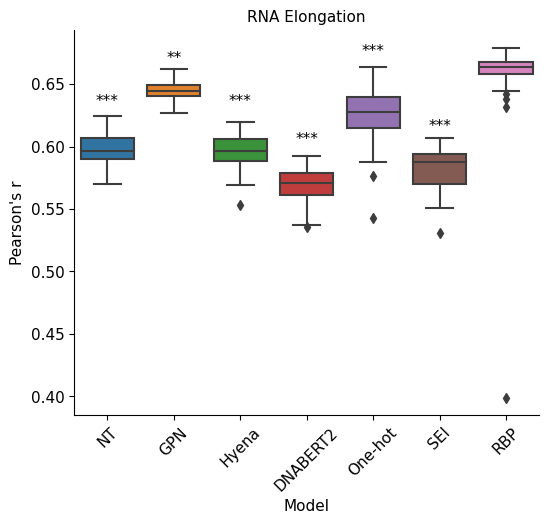

In [22]:
fig, ax = plt.subplots(figsize=(6,5))
sns.boxplot(df1,x='Input Data',y= 'Prediction Pearson R', ax = ax,order = ['NT','GPN','Hyena','DNABERT2','One-hot','SEI','RBP'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel("Pearson's r",fontsize=11)
plt.xlabel("Model",fontsize=11)
plt.title('RNA Elongation',fontsize=11)
ax.grid(False)
plt.yticks(fontsize=11);
plt.xticks(fontsize=11,rotation=45);
plt.text(0, 0.63, "***", ha='center', va='bottom', color='k', fontsize=11)
plt.text(1, 0.665, "**", ha='center', va='bottom', color='k', fontsize=11)
plt.text(2, 0.63, "***", ha='center', va='bottom', color='k', fontsize=11)
plt.text(3, 0.60, "***", ha='center', va='bottom', color='k', fontsize=11)
plt.text(4, 0.67, "***", ha='center', va='bottom', color='k', fontsize=11)
plt.text(5, 0.61, "***", ha='center', va='bottom', color='k', fontsize=11)
plt.savefig('./insert.svg')